# CS696 Assignment 2

## CSV File Paths

In [1]:
VEHICLES_CSV_PATH = './vehicles.csv'
CAUSES_OF_DEATH_CSV_PATH = './causes_of_death.csv'
FRAMINGHAM_CSV_PATH = './framingham.csv'

## Imports and Function Definitions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, t
from scipy import mean
sns.set()

In [3]:
def plot_small():
    plt.figure(figsize=(5,3), dpi=150)
    
def plot_large():
    plt.figure(figsize=(8,5), dpi=150)

def calculate_ci(data, confidence=0.95, print_results=False):
    confidence = 0.95

    num_samples = len(data)
    mean_value = mean(data)
    std_err = sem(data)
    deviation = std_err * t.ppf((1 + confidence) / 2, num_samples - 1)

    start = mean_value - deviation
    end = mean_value + deviation
    if print_results:
        print("{}% Confidence Interval: {} - {}".format(confidence*100, start, end))
    return (start, end)

## Issue 1 - Auto Fuel Economy
We'll create some variables and dataframes that we'll use for the questions in issue 1.

In [4]:
auto_df = pd.read_csv(VEHICLES_CSV_PATH)
brands = {
    'General Motors': ['General Motors', 'Chevrolot', 'Cadillac', 'GMC'],
    'Ford': ['Ford', 'Lincoln'],
    'Chrysler': ['Chrylser', 'Dodge', 'Jeep', 'Ram'],
    'Toyota': ['Toyota', 'Daihatsu', 'Lexus', 'Subaru'],
    'Honda': ['Honda', 'Acura'],
}
brand_makes = list(brands.keys())
fuel_types = ['Midgrade Gasoline', 'Regular Gasoline', 'Premium Gasoline']
auto_df = auto_df.loc[auto_df['year'].isin(range(2000,2020)) & auto_df['fuelType1'].isin(fuel_types)]

c:\program files\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Question 1: Box plots for combined MPG for all cars sold by each brand (2000 - 2019)

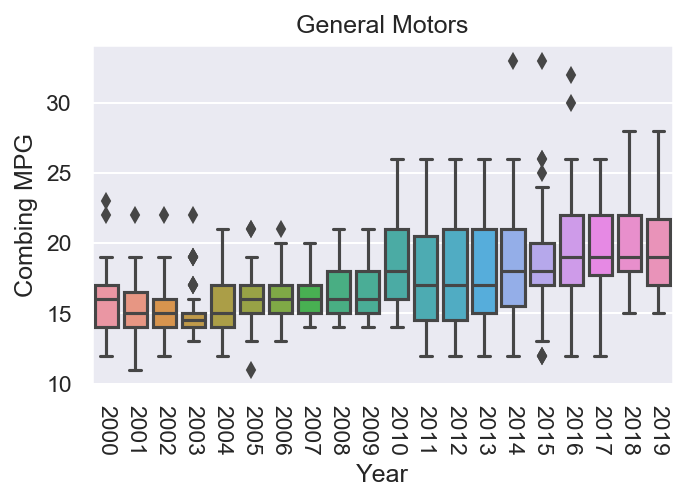

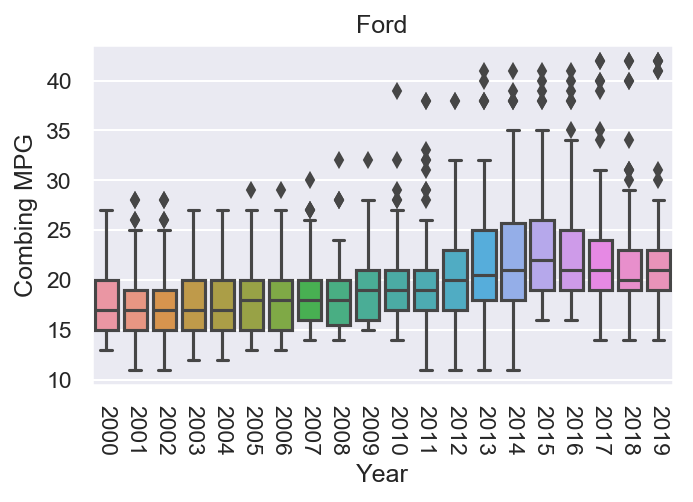

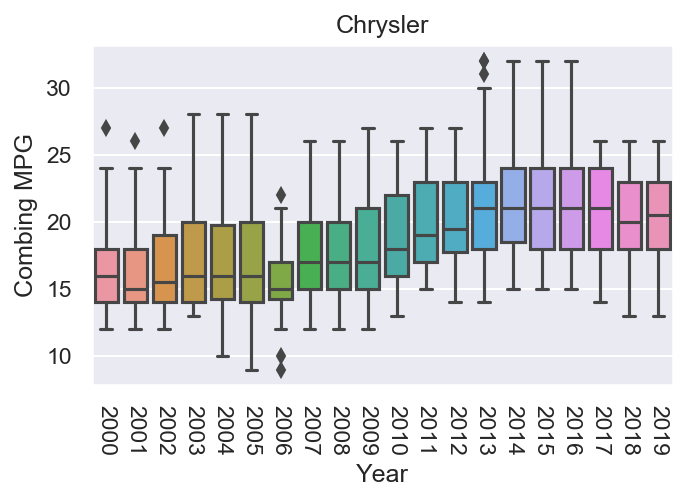

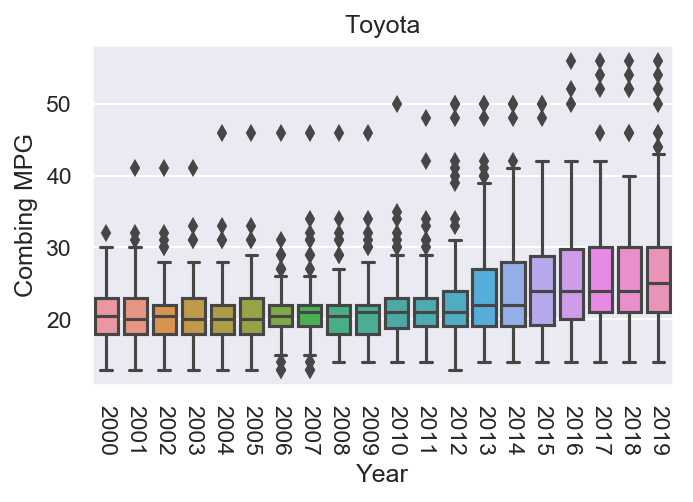

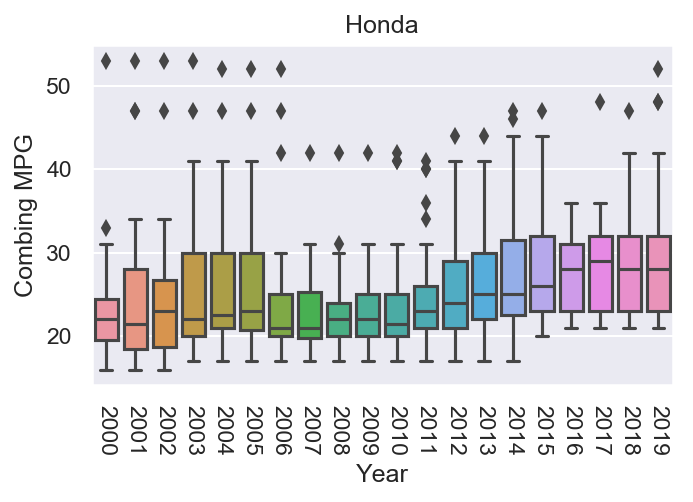

In [5]:
for make in brand_makes:
    plot_small()
    sns.boxplot(x='year', y='comb08', data=auto_df[auto_df['make'].isin(brands[make])])
    plt.xticks(rotation=-90)
    plt.xlabel('Year')
    plt.ylabel('Combing MPG')
    plt.title(make)

### Question 2: Average combined MPG for all cars sold by each brand (2000 - 2019)

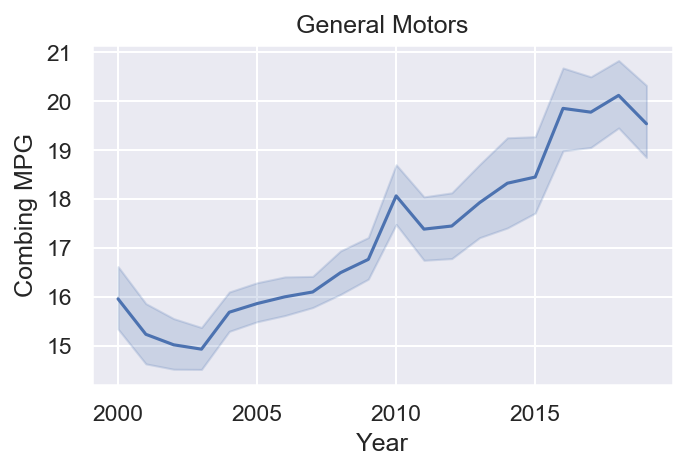

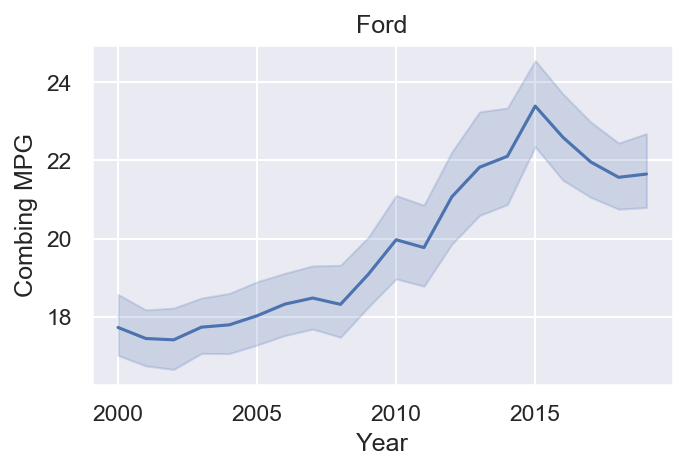

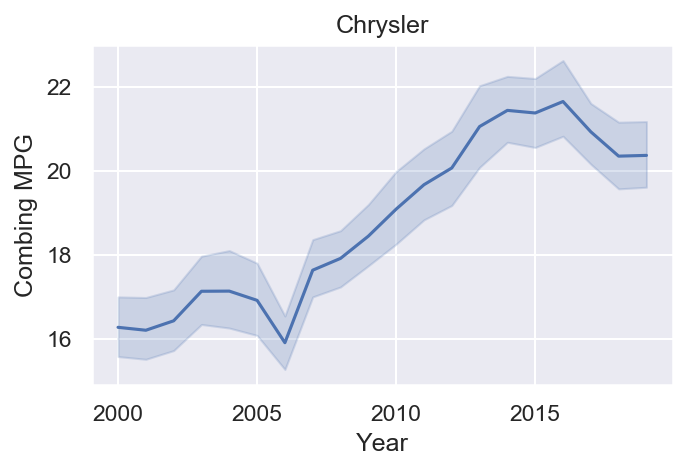

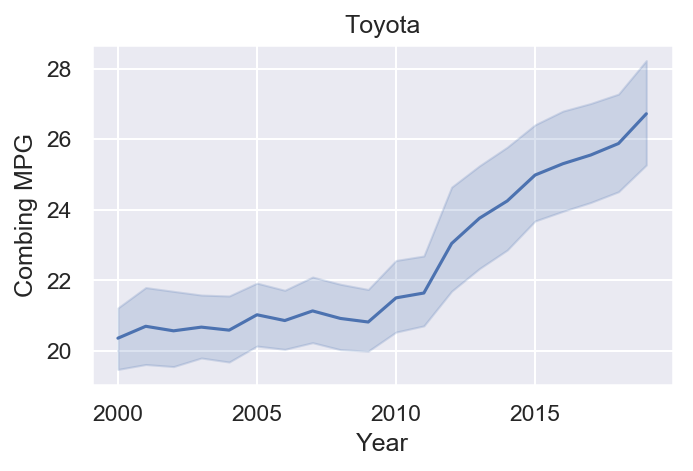

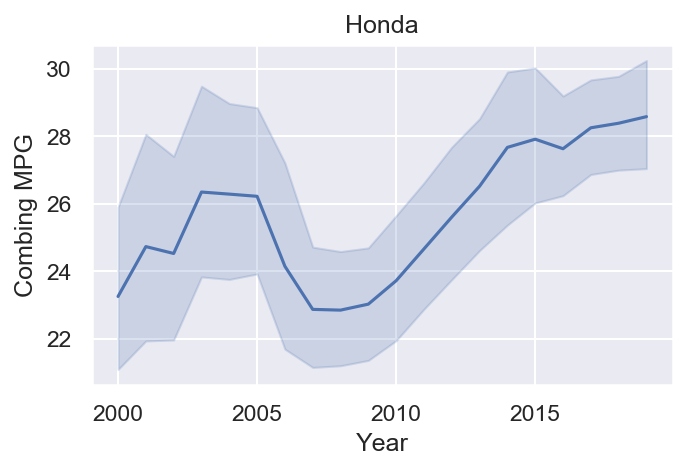

In [6]:
for make in brand_makes:
    plot_small()
    sns.lineplot(x='year', y='comb08', data=auto_df[auto_df['make'].isin(brands[make])])
    plt.xlabel('Year')
    plt.ylabel('Combing MPG')
    plt.title(make)

### Question 3: Max combined MPG for each brand per year (2000 - 2019)

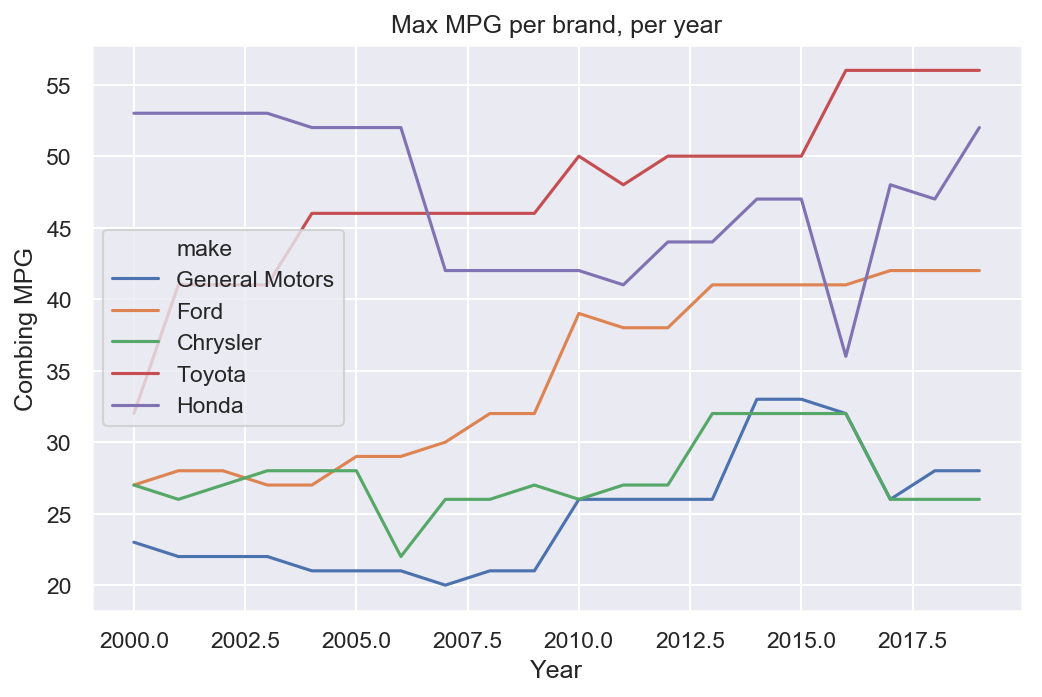

In [7]:
prob1c_df = auto_df.groupby(['make', 'year'])['comb08'].max().reset_index()
max_mpgs = []
for make in brand_makes:               # To do this, we're going to go brand by brand...
    max_mpgs.append(                   # and we're going to append into the list...
        prob1c_df[                     # values from our data of max mpgs per make per year...
            prob1c_df['make']          # by taking values from the 'make' column...
            .isin(brands[make])        # and seeing if they're part of the brand we want...
        ].groupby('year').max()        # then grouping these by year and then taking the max value...
        .reset_index()                 # after which we reset the index to remove the hierarchical indexing...
        .replace(brands[make], make))  # and finally we replace the subsidiaries with the brand name! Phew.

max_mpgs_df = pd.concat(max_mpgs)
plot_large()
sns.lineplot(x='year', y='comb08', hue='make', data=max_mpgs_df)
plt.xlabel('Year')
plt.ylabel('Combing MPG')
plt.title('Max MPG per brand, per year');

## Issue 2 - Diet and Death
Once again we'll read in CSV files and create some dataframes for problems in issue 2.

In [8]:
cod_df = pd.read_csv(CAUSES_OF_DEATH_CSV_PATH)
framingham_df = pd.read_csv(FRAMINGHAM_CSV_PATH)

#### Plot of death rate for each disease over the years

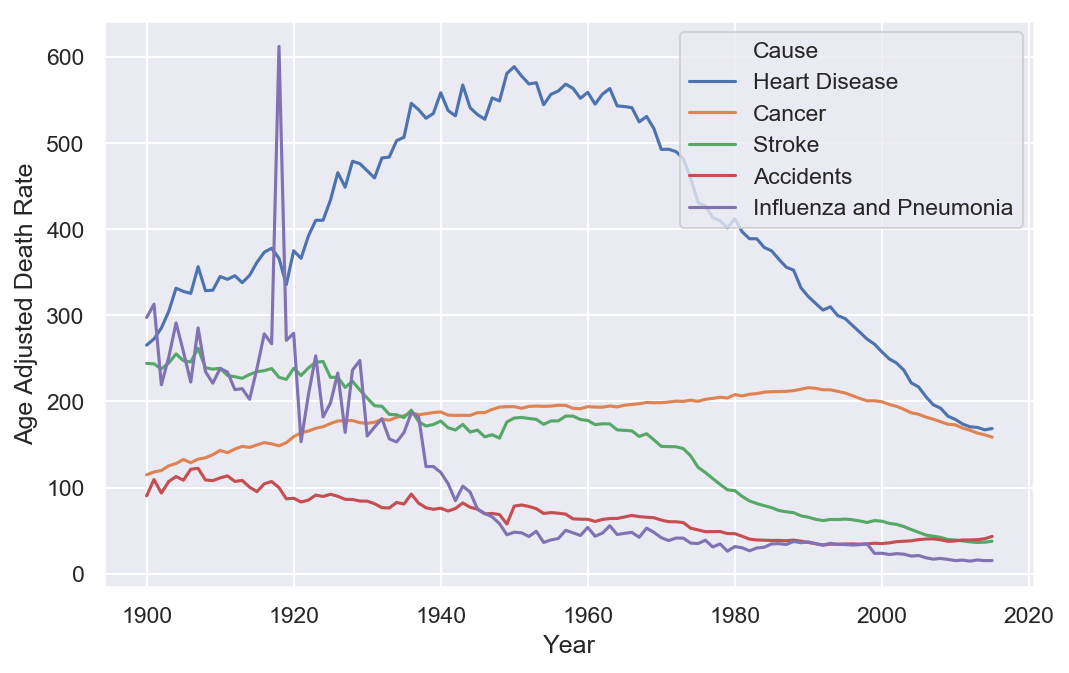

In [9]:
plot_large()
sns.lineplot(x="Year", y="Age Adjusted Death Rate", hue="Cause", data=cod_df);

### Question 4: Percentage of people with Diabetes, as per Framingham

In [10]:
percentages = framingham_df['DIABETES'].value_counts(normalize=True) * 100
print("Percentage: {}%".format(percentages[1]))

Percentage: 2.732951587714732%


### Question 5: Histogram of random samples

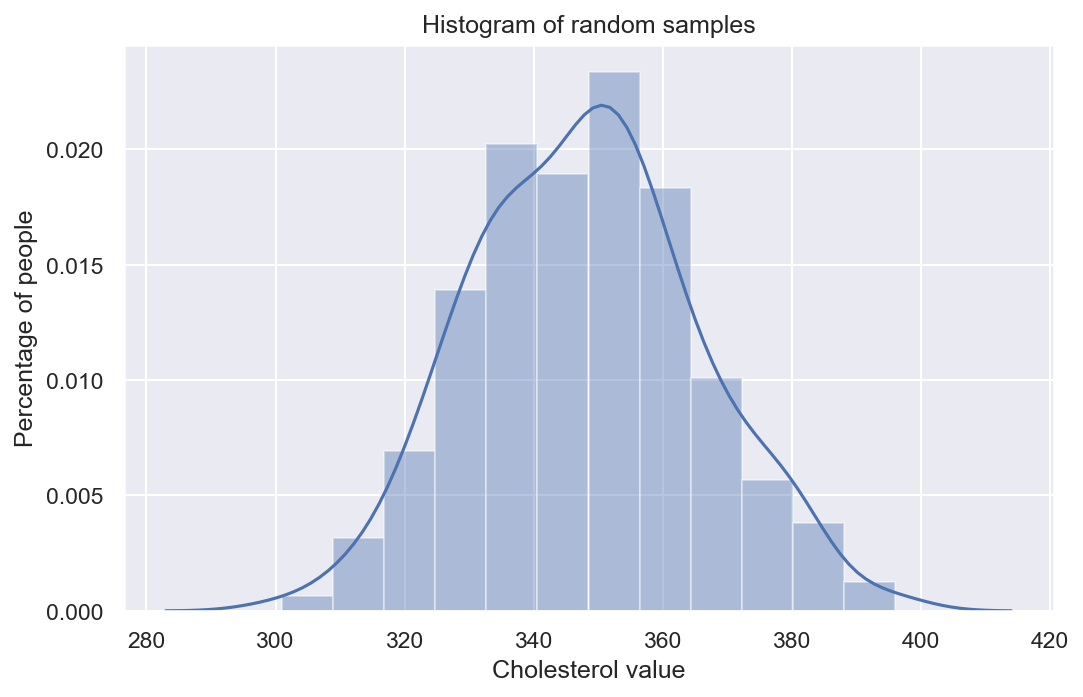

In [11]:
# Variables
random_samples = []
sample_size = 5000
cdc_diabetes_prevalance = 0.93
num_samples = 200
probabilities = [cdc_diabetes_prevalance, 1 - cdc_diabetes_prevalance]

# Generating random samples
for i in range(num_samples):
    random_samples.append(np.random.multinomial(sample_size, probabilities))
random_samples_df = pd.DataFrame(random_samples)

# Plotting histogram
plot_large()
sns.distplot(random_samples_df[1])
plt.title('Histogram of random samples')
plt.xlabel('Cholesterol value')
plt.ylabel('Percentage of people');

### Question 6: 95% Confidence Interval for samples computed in Question 5

In [12]:
calculate_ci(random_samples_df[1], print_results=True);

95.0% Confidence Interval: 345.55859559532183 - 350.4014044046782


### Question 7: Is the study representative of the general population?
The CDC stated that the prevelance of diabetes at the time of the study was 0.93%. However, from the above calculations (specifically from Question 4) we can see that the percentage of people with diabetes in the study is **2.73%**.

Clearly the proportion of diabetic people in the study is more than the proportion of diabetic people in the general population by quite a large margin (nearly 2.7 times more diabetics in the study than in the general population). For that reason the study may not be representative of the general population.

### Question 8: Plot of cholesterol values of people in Framingham Study with heart disease vs. people without

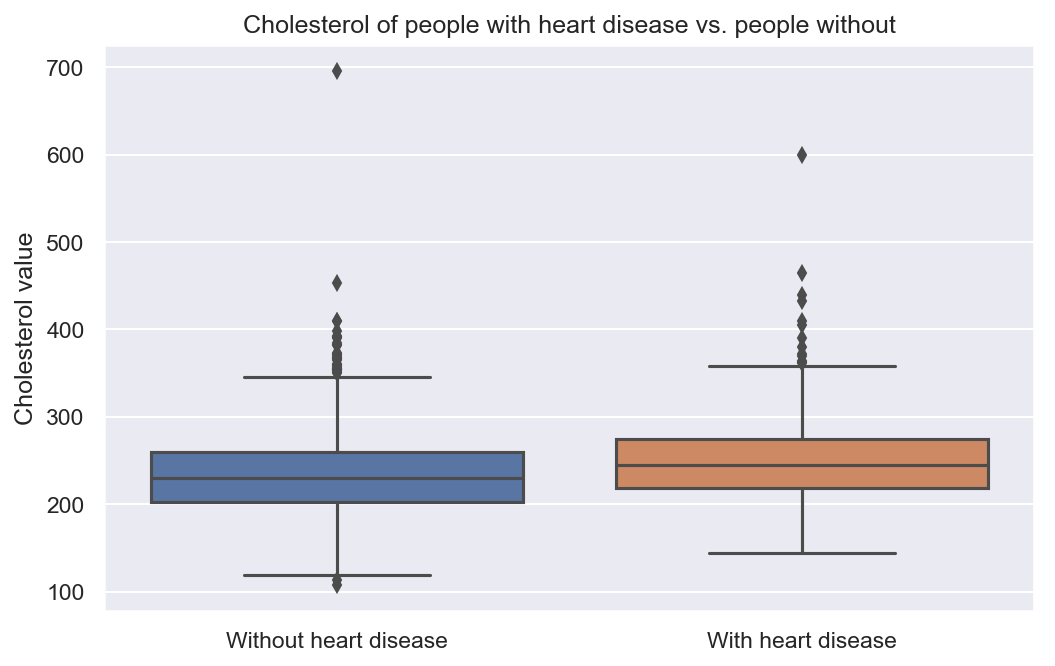

In [13]:
plot_large()
sns.boxplot(x='ANYCHD', y='TOTCHOL', data=framingham_df)
plt.title('Cholesterol of people with heart disease vs. people without')
plt.xticks(range(2), ['Without heart disease', 'With heart disease'])
plt.xlabel('')
plt.ylabel('Cholesterol value');

### Question 9: 95% Confidence Interval of cholesterol for people in Framingham Study with heart disease vs. people without

In [14]:
print("Cholesterol CI for people with heart disease:")
calculate_ci(framingham_df.query('ANYCHD == 1')['TOTCHOL'].values, print_results=True)
print("Cholesterol CI for people without heart disease:")
calculate_ci(framingham_df.query('ANYCHD == 0')['TOTCHOL'].values, print_results=True);

Cholesterol CI for people with heart disease:
95.0% Confidence Interval: 246.5403082552965 - 252.42405233170558
Cholesterol CI for people without heart disease:
95.0% Confidence Interval: 231.25983474347473 - 234.43268603214855


### Question 10: Comments on the correlation between cholesterol values and heart disease
Looking at the plot from question 8 and the results of question 9, one can say that people with heart disease are likelier to have higher cholesterol values than people without heart disease.